In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# auto-reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
df = pd.read_csv('../data/raw/beer_reviews.csv')

### Data Exploration

In [77]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [78]:
df.shape

(1586614, 13)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [80]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [81]:
# review_overall shows 0 - does this mean it wasn't reviewed and can be excluded from model?
df.loc[df['review_overall']==0]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.0,3806
39648,1413,Desert Edge Brewery,1030267158,0.0,4.0,0.0,beernut7,Irish Dry Stout,2.0,2.0,Latter Days Stout,4.0,3804
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.0,3788
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787
653726,1412,Red Rock Brewing Company,1030007737,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.0,3822
653740,1412,Red Rock Brewing Company,1030008039,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.0,3786


In [82]:
df.isnull().any()

brewery_id            False
brewery_name           True
review_time           False
review_overall        False
review_aroma          False
review_appearance     False
review_profilename     True
beer_style            False
review_palate         False
review_taste          False
beer_name             False
beer_abv               True
beer_beerid           False
dtype: bool

In [83]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [84]:
df.isnull().sum() * 100 / len(df)

brewery_id            0.000000
brewery_name          0.000945
review_time           0.000000
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
review_profilename    0.021934
beer_style            0.000000
review_palate         0.000000
review_taste          0.000000
beer_name             0.000000
beer_abv              4.272306
beer_beerid           0.000000
dtype: float64

In [85]:
# check for id column / unique column
for col in df:
    print(f'{col}: {df[col].is_unique}')

brewery_id: False
brewery_name: False
review_time: False
review_overall: False
review_aroma: False
review_appearance: False
review_profilename: False
beer_style: False
review_palate: False
review_taste: False
beer_name: False
beer_abv: False
beer_beerid: False


In [86]:
# unique values in each columns
for x in df.columns:
    #printing unique values
    print(x ,':', len(df[x].unique()))

brewery_id : 5840
brewery_name : 5743
review_time : 1577960
review_overall : 10
review_aroma : 9
review_appearance : 10
review_profilename : 33388
beer_style : 104
review_palate : 9
review_taste : 9
beer_name : 56857
beer_abv : 531
beer_beerid : 66055


In [87]:
# unique counts of target variable
#print(df['beer_style'].unique())
df['beer_style'].value_counts().head(25)

American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
American Porter                      50477
American Amber / Red Ale             45751
Belgian Strong Dark Ale              37743
Fruit / Vegetable Beer               33861
American Strong Ale                  31945
Belgian Strong Pale Ale              31490
Saison / Farmhouse Ale               31480
American Adjunct Lager               30749
Tripel                               30328
Witbier                              30140
Hefeweizen                           27908
American Barleywine                  26728
American Brown Ale                   25297
American Stout                       24538
American Pale Wheat Ale              24204
Märzen / Oktoberfest                 23523
English Pale Ale                     23402
German Pilsener                      22155
Doppelbock 

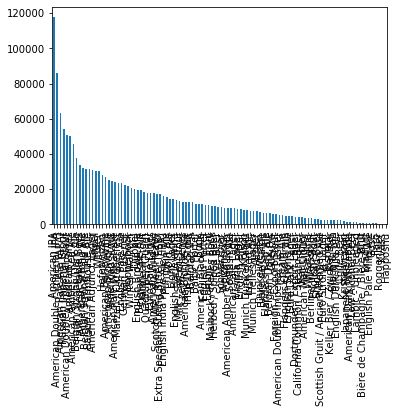

In [88]:
# data imbalance in target variable

df['beer_style'].value_counts().plot.bar()

### Data Preparation

In [153]:
df_cleaned = df.copy()

In [154]:
df_cleaned.drop_duplicates(inplace= True)
df_cleaned.columns = df_cleaned.columns.str.strip()

In [155]:
# handle null values in brewery_name, beer_abv

df_cleaned.dropna(inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)

In [156]:
df_cleaned.isnull().sum() * 100 / len(df_cleaned)

brewery_id            0.0
brewery_name          0.0
review_time           0.0
review_overall        0.0
review_aroma          0.0
review_appearance     0.0
review_profilename    0.0
beer_style            0.0
review_palate         0.0
review_taste          0.0
beer_name             0.0
beer_abv              0.0
beer_beerid           0.0
dtype: float64

In [157]:
df_cleaned = df_cleaned.loc[:,['brewery_name', 'review_overall','review_aroma', 'review_appearance', 'beer_style','review_palate', 'review_taste','beer_abv']]

# removing duplicates from here provides a much much reduced dataset - possibility to explore

In [162]:
df_cleaned.shape

(1518478, 8)

In [163]:
df_cleaned_alt = df_cleaned.copy()
df_cleaned_alt.drop_duplicates(inplace= True)

In [164]:
df_cleaned_alt.shape

(938713, 8)

In [161]:
df_cleaned_alt.head()

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,Vecchio Birraio,1.5,2.0,2.5,Hefeweizen,1.5,1.5,5.0
1,Vecchio Birraio,3.0,2.5,3.0,English Strong Ale,3.0,3.0,6.2
2,Vecchio Birraio,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,6.5
3,Vecchio Birraio,3.0,3.0,3.5,German Pilsener,2.5,3.0,5.0
4,Caldera Brewing Company,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,7.7


### Feature Engineering

In [94]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

In [95]:
sc = StandardScaler()

In [96]:
num_cols = df_cleaned.select_dtypes([np.number]).columns
#df_cleaned.select_dtypes([np.number]).columns
#num_cols = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

In [97]:
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

In [98]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [99]:
cat_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns
#df_cleaned.select_dtypes(exclude=[np.number]).columns

In [100]:
# unique values in each columns
for x in df_cleaned[cat_cols].columns:
    #printing unique values
    print(x ,':', len(df_cleaned[x].unique()))

brewery_name : 5155
beer_style : 104


In [101]:
# class distribution of target variable
def get_class_distribution(obj):
    items = df_cleaned['beer_style']
    count = {}
    for item in items:
        count[item] = count.get(item, 0) + 1
    return count

In [102]:
get_class_distribution(df_cleaned)

{'Hefeweizen': 13226,
 'English Strong Ale': 2951,
 'Foreign / Export Stout': 3153,
 'German Pilsener': 12380,
 'American Double / Imperial IPA': 30174,
 'Herbed / Spiced Beer': 6150,
 'Light Lager': 6446,
 'Oatmeal Stout': 8207,
 'American Pale Lager': 5698,
 'Rauchbier': 1888,
 'American Pale Ale (APA)': 29810,
 'American Porter': 21847,
 'Belgian Strong Dark Ale': 15274,
 'American IPA': 43356,
 'Russian Imperial Stout': 17667,
 'American Amber / Red Ale': 21323,
 'American Strong Ale': 12195,
 'Märzen / Oktoberfest': 10709,
 'American Adjunct Lager': 17190,
 'American Blonde Ale': 7617,
 'Euro Pale Lager': 11367,
 'English Brown Ale': 9302,
 'Fruit / Vegetable Beer': 18471,
 'Belgian Pale Ale': 10444,
 'English Bitter': 6104,
 'English Porter': 5584,
 'Irish Dry Stout': 5587,
 'American Barleywine': 11642,
 'American Double / Imperial Stout': 18093,
 'Doppelbock': 9212,
 'American Stout': 10722,
 'Maibock / Helles Bock': 5058,
 'Dortmunder / Export Lager': 2426,
 'Euro Strong Lager

In [167]:
labels_unique, counts = np.unique(df_cleaned['beer_style'], return_counts =True)
print("Unique labels : {}".format(labels_unique))
class_weights = [sum(counts) / c for c in counts]

# number of samples of the class (beer_style) = 104

# [64]  'Happoshu': 214 
# [9]   'American Double / Imperial IPA': 85105 
# 'Munich Helles Lager': 4552

# Class Weights
# 'Happoshu': 214 -> 1-(104/214) = 0.99
# 'American Double / Imperial IPA' -> 1-(104/85105) = 0.94
# 'Munich Helles Lager': 4552 -> 1-(104/4552) = 0.97


Unique labels : ['Altbier' 'American Adjunct Lager' 'American Amber / Red Ale'
 'American Amber / Red Lager' 'American Barleywine' 'American Black Ale'
 'American Blonde Ale' 'American Brown Ale' 'American Dark Wheat Ale'
 'American Double / Imperial IPA' 'American Double / Imperial Pilsner'
 'American Double / Imperial Stout' 'American IPA' 'American Malt Liquor'
 'American Pale Ale (APA)' 'American Pale Lager' 'American Pale Wheat Ale'
 'American Porter' 'American Stout' 'American Strong Ale'
 'American Wild Ale' 'Baltic Porter' 'Belgian Dark Ale' 'Belgian IPA'
 'Belgian Pale Ale' 'Belgian Strong Dark Ale' 'Belgian Strong Pale Ale'
 'Berliner Weissbier' 'Bière de Champagne / Bière Brut' 'Bière de Garde'
 'Black & Tan' 'Bock' 'Braggot' 'California Common / Steam Beer'
 'Chile Beer' 'Cream Ale' 'Czech Pilsener' 'Doppelbock'
 'Dortmunder / Export Lager' 'Dubbel' 'Dunkelweizen' 'Eisbock'
 'English Barleywine' 'English Bitter' 'English Brown Ale'
 'English Dark Mild Ale' 'English India Pa

('American Double / Imperial IPA', 85105)

In [34]:
cat_cols = df_cleaned[['brewery_name']].columns

In [35]:
target = df_cleaned[['beer_style']].columns

In [36]:
#df_cleaned['beer_style'] = le.fit_transform(df_cleaned['beer_style'])
#df_cleaned['brewery_name'] = oe.fit_transform(df_cleaned['brewery_name'].values.reshape(-1,1))

df_cleaned[target] = le.fit_transform(df_cleaned[target])
df_cleaned[cat_cols] = oe.fit_transform(df_cleaned[cat_cols].values.reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
df_cleaned.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,4886.0,-2.065354,-1.792322,65,-2.749846,-2.598328,-0.772741
1,4886.0,-1.411433,-1.061991,51,-0.771241,-0.745851,-0.249326
2,4886.0,-1.411433,-1.061991,59,-0.771241,-0.745851,-0.118472
3,4886.0,-0.757511,-0.331661,61,-1.430776,-0.745851,-0.772741
4,1360.0,1.204255,0.398670,9,0.547829,1.106625,0.404943


In [38]:
# INVERSE ENCODING
#df_cleaned['beer_style'] = le.inverse_transform(df_cleaned['beer_style'])
#df_cleaned['brewery_name'] = oe.inverse_transform(df_cleaned['brewery_name'].values.reshape(-1,1))

In [39]:
df_cleaned.head()

,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv
0,4886.0,-2.065354,-1.792322,65,-2.749846,-2.598328,-0.772741
1,4886.0,-1.411433,-1.061991,51,-0.771241,-0.745851,-0.249326
2,4886.0,-1.411433,-1.061991,59,-0.771241,-0.745851,-0.118472
3,4886.0,-0.757511,-0.331661,61,-1.430776,-0.745851,-0.772741
4,1360.0,1.204255,0.398670,9,0.547829,1.106625,0.404943


In [40]:
from src.data.sets import split_sets_random, save_sets

# Split data into training and testing 80:20
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_random(df_cleaned, target_col='beer_style', test_ratio=0.2)

# save sets in the data/processed folder
save_sets(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, X_test=X_test, y_test=y_test, path='../data/processed/')

Principal Component Analysis to reduce dimensionality doesn't produce any helpful results. <p/> When would this be used?

In [41]:
from sklearn.decomposition import PCA

In [42]:
df_train = pd.DataFrame(X_train, columns=X_train.columns[:-1])
df_test = pd.DataFrame(X_test, columns=X_test.columns)

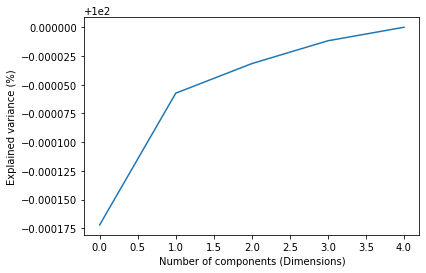

In [43]:
pca = PCA(n_components=None)
pca.fit(df_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
plt.show()

### Baseline Model

In [44]:
from src.models.null import NullModel

In [45]:
# classification metrics 
# (NullModel returns regression metrics by default/without target_type )

baseline_model = NullModel(target_type='classification')
y_base = baseline_model.fit_predict(y_train)

In [46]:
from src.models.performance import print_class_perf

In [47]:
#print_reg_perf(y_base, y_train, set_name='Training')
print_class_perf(y_base, y_train, set_name='Training', average='weighted')

Accuracy Training: 0.05959183295779991
F1 Training: 0.006702933044240932


### Custom Dataset for Neural Network

In [48]:
# Solution:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [49]:
#convert sets to PytorchDataset
from src.models.pytorch import PytorchDataset

#train_dataset = PytorchDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
#val_dataset = PytorchDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
#test_dataset = PytorchDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

train_dataset = PytorchDataset(X=X_train, y=y_train)
val_dataset = PytorchDataset(X=X_val, y=y_val)
test_dataset = PytorchDataset(X=X_test, y=y_test)

### Weighted Sampling

In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [51]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([7.5609e-05, 3.3887e-04, 3.1716e-04, 8.0775e-05, 3.3141e-05, 1.6260e-04,
        1.5513e-04, 1.2185e-04, 1.7550e-04, 5.2966e-04, 3.3546e-05, 4.5773e-05,
        6.5471e-05, 2.3065e-05, 5.6603e-05, 4.6898e-05, 8.2001e-05, 9.3379e-05,
        5.8173e-05, 1.3129e-04, 8.7974e-05, 1.0750e-04, 5.4139e-05, 9.5749e-05,
        1.6383e-04, 1.7908e-04, 1.7899e-04, 8.5896e-05, 5.5270e-05, 1.0855e-04,
        9.3266e-05, 1.9771e-04, 4.1220e-04, 4.3995e-04, 1.1074e-03, 1.1471e-04,
        1.7658e-04, 1.2070e-04, 2.3502e-04, 2.0777e-04, 1.3920e-04, 2.5465e-04,
        8.5266e-05, 1.7646e-04, 2.1683e-04, 2.2847e-04, 2.7189e-04, 2.3132e-04,
        2.0371e-04, 6.9488e-05, 1.8622e-04, 6.8615e-05, 1.6311e-04, 6.7295e-04,
        3.2798e-04, 1.2346e-04, 8.0019e-05, 7.1301e-05, 7.6464e-05, 4.3234e-04,
        9.4607e-05, 5.3163e-04, 1.2806e-04, 2.7980e-04, 6.1162e-04, 1.0408e-04,
        2.7724e-04, 2.8719e-04, 2.3941e-04, 9.0334e-04, 4.6860e-04, 1.5274e-04,
        1.9084e-04, 3.4352e-04, 8.6580e-

In [52]:
class_weights_all = class_weights[target_list.long()]

In [53]:
from torch.utils.data import WeightedRandomSampler

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

### Define Architecture

Instantiate `PytorchMultiClass` with the correct number of input feature and save it into a variable called `model`
<p/>May need to adjust to take more inputs with beer api

In [54]:
from src.models.pytorch import PytorchMultiClass

# May need to adjust to take more inputs with beer api
# shape[1] refers to number of columns / features
model = PytorchMultiClass(X_train.shape[1], 104)

In [55]:
from src.models.pytorch import get_device

device = get_device()
model.to(device)

PytorchMultiClass(
  (layer_1): Linear(in_features=6, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_out): Linear(in_features=128, out_features=104, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [58]:
# attempt to apply weighted sampling

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [60]:
# define model parameters

N_EPOCHS = 3
BATCH_SIZE = 32

### Train Model

In [61]:
from src.models.pytorch import train_classification, test_classification

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_dataset, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(val_dataset, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')

KeyboardInterrupt: 

In [ ]:
torch.save(model, "../models/pytorch_multi_beer_style.pt")

#### Build Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps=[
        ('ordinal_encoder', OrdinalEncoder())
    ]
)

target_transformer = Pipeline(
    steps=[
        ('label_encoder', LabelEncoder())
    ]
)

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_cols', num_transformer, num_cols),
        ('cat_cols', cat_transformer, cat_cols),
        ('target', target_transformer, target)
    ]
)

In [ ]:
gmm_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clustering', GaussianMixture(n_components=6, random_state=8))
    ]
)

In [ ]:
gmm_pipe.fit(X_train)

In [ ]:
gmm_pipe.predict(X_train)

In [ ]:
obs = pd.DataFrame(X_train.iloc[0]).transpose()
gmm_pipe.predict(obs)

In [ ]:
from joblib import dump 

dump(gmm_pipe,  '../models/gmm_pipeline.joblib')